# Predicting Customer Lifetime Value (CLV) with Random Forest

The objective of this project is to use the Random Forest library to predict the Customer Lifetime Value (CLV) that a customer will have after 3 months. 

CLV prediction holds significant importance for an online business. By gaining insights into the future value of customers, we can optimize marketing strategies, tailor customer experiences, and allocate resources more effectively. Understanding CLV is crucial for fostering customer loyalty, identifying high-value segments, and maximizing the overall profitability of the business. The data utilized for this project are derived from an online business where customers can make multiple product purchases.The data used are covering a period from January 2021 - December 2023.

The procedure is outlined as follows:
- Split the dataset into two parts based on a cutoff date applied to the purchase date.
- Conduct Recency, Frequency, and Monetary value (RFM) analysis on the dataset to discern the spending behavior of customers. The features generated from this analysis will serve as the training data.
- Calculate the total CLV for the months that follow the cutoff date; this will be employed as the target variable.
- Train and test the Random Forest model.
- Evaluate the model's predictive performance on a future dataset.
- Plot feature importance and the comparison between Actual and Predicted CLV.

Prioritizing the minimization of mean absolute error, the Random Forest model aims to strike a balance between precision and explanatory power. This contributes to a more reliable and effective prediction of Customer Lifetime Value in the context of the online business.

After training the Random Forest model, its performance will be evaluated by predicting Customer Lifetime Value (CLV) for the test dataset. The evaluation metrics, namely MAE, R-squared (R2), and Mean Absolute Percentage Error (MAPE), are selected for their effectiveness in assessing the model's precision and goodness of fit.

**Note:** Please be advised that all data used in the examples and illustrations provided in this conversation are randomly generated and solely for educational and illustrative purposes. Any resemblance to actual data is purely coincidental.

**Comment:** There are explanatory hashtags above each line of code for ease of understanding and being able to follow the process better.


In [1]:
# Import Libraries
import numpy as np 
import pandas as pd
import datetime
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from dateutil.relativedelta import relativedelta
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reads the excell file into a dataframe 
df = pd.read_excel(r'C:\LTV_Data_Sample_10.xlsx')

In [3]:
# Set display options to show all columns
pd.set_option('display.max_columns', None)

# Convert columns to datetime
df[['Lead_Date', 'Purchase_Date']] = df[['Lead_Date', 'Purchase_Date']].apply(pd.to_datetime)

---
## Data Exploration
In order to gain an understanding of the data used, the first 10 rows of the dataset are shown below, along with additional information on data types, statistics related to the 'Amount_USD' column, any missing values, and CLV. As it can be seen, the dataset includes a Customer_ID along with the channel it originated from and the date the customer became a lead. Additionally, the dataset includes the customer's country and every purchase made by the customer during the dataset's timeframe.

In [4]:
# Show the first 10 records along with all columns
df.head(10)

,Customer_ID,Channel,Lead_Date,Country_Code,Amount_USD,Purchase_Date
0,12,Organic,2023-04-25 05:44:29,JP,744.60,2023-04-28 08:37:36
1,12,Organic,2023-04-25 05:44:29,JP,729.78,2023-05-20 12:58:54
2,12,Organic,2023-04-25 05:44:29,JP,1454.12,2023-05-28 10:48:59
3,12,Organic,2023-04-25 05:44:29,JP,721.75,2023-05-28 11:56:11
4,12,Organic,2023-04-25 05:44:29,JP,100.00,2023-06-01 15:53:30
5,12,Organic,2023-04-25 05:44:29,JP,692.80,2023-06-30 06:22:56
6,12,Organic,2023-04-25 05:44:29,JP,2105.40,2023-07-11 10:46:58
7,12,Organic,2023-04-25 05:44:29,JP,5264.53,2023-07-16 15:27:54
8,46,Organic,2023-04-10 11:07:12,JP,692.65,2023-07-02 17:11:30
9,46,Organic,2023-04-10 11:07:12,JP,1500.86,2023-07-07 12:46:38


In [5]:
# Display basic information about the dataset
print("\nData Types:")
print(df.dtypes)
print("\nSummary Statistics:")
print(df['Amount_USD'].describe())
print("\nMissing Values:")
print(df.isnull().sum())


Data Types:
Customer_ID               int64
Channel                  object
Lead_Date        datetime64[ns]
Country_Code             object
Amount_USD              float64
Purchase_Date    datetime64[ns]
dtype: object

Summary Statistics:
count    22848.000000
mean       659.565132
std       1126.118680
min        100.000000
25%        113.450000
50%        248.735000
75%        593.450000
max       7000.000000
Name: Amount_USD, dtype: float64

Missing Values:
Customer_ID      0
Channel          0
Lead_Date        0
Country_Code     0
Amount_USD       0
Purchase_Date    0
dtype: int64


The provided summary statistics describe the 'Amount_USD' column in the dataset, which represents the monetary value of transactions. Here's a brief explanation of each statistic:

- Count: There are 22,866 entries in the 'Amount_USD' column, indicating the total number of transactions or financial events recorded.

- Mean: The mean (average) amount is approximately $659.

- Standard Deviation (std): The standard deviation is approximately $1126, indicating the average deviation of each individual amount from the mean of 659 USD.

- Minimum (min): The minimum 'Amount_USD' value is $100.

- 25th Percentile (25%): 25% of the transactions have an 'Amount_USD' value less than or equal to $113. 

- 50th Percentile (Median): The median 'Amount_USD' value is $248, indicating that 50% of the transactions fall below this value. 

- 75th Percentile (75%): 75% of the transactions have an 'Amount_USD' value less than or equal to $593. 

- Maximum (max): The maximum 'Amount_USD' value is $7000, representing the largest recorded transaction amount in the dataset.

Below, a Histogram and a Box Plot are plotted to provide a better idea of the data. The Histogram shows that the vast majority of purchases occur in the bins of 0 - 1000 USD. On the Box Plot, we can observe numerous outliers located at higher values, e.g., >1200.


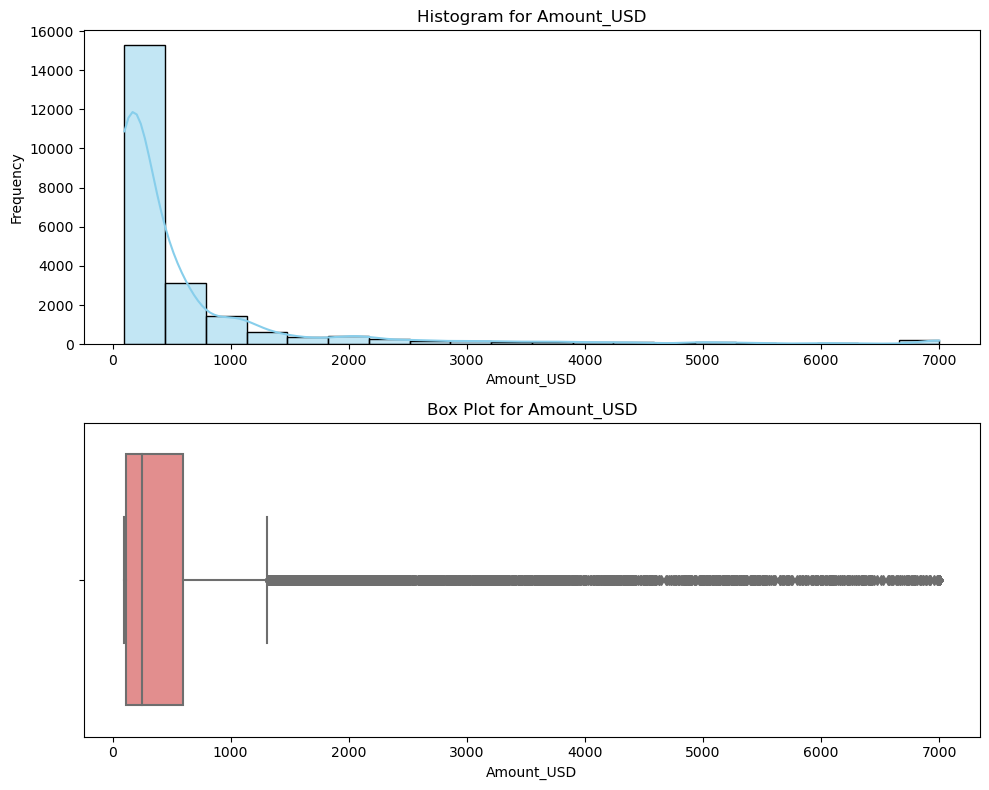

In [6]:
# Set up subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Plot Histogram for 'Amount_USD'
sns.histplot(df['Amount_USD'], bins=20, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Histogram for Amount_USD')
axes[0].set_xlabel('Amount_USD')
axes[0].set_ylabel('Frequency')

# Plot Box Plot for 'Amount_USD'
sns.boxplot(x=df['Amount_USD'], color='lightcoral', ax=axes[1])
axes[1].set_title('Box Plot for Amount_USD')
axes[1].set_xlabel('Amount_USD')

# Adjust layout
plt.tight_layout()
plt.show()


The summary statistics shown below provide an overview of the Customer Lifetime Value (CLV) distribution. The dataset consists of 6,565 unique customers. The mean CLV is approximately 2,295 USD, indicating the average monetary value generated by each customer. The standard deviation of 6,266 USD reflects the degree of variability in CLV among customers. The minimum CLV is 100 USD, representing the lowest observed value, while the maximum CLV is 174,301 USD, signifying the highest observed value. The quartiles further illustrate the distribution: 25% of customers have a CLV less than or equal to 209 USD, 50% have a CLV less than or equal to 541 USD (the median), and 75% have a CLV less than or equal to 1,720 USD.

In [20]:
# Group by Customer_ID and sum the total amount to find CLV
clv_data = df.groupby('Customer_ID')['Amount_USD'].sum()

# Summary statistics for CLV
summary_statistics = clv_data.describe()

print("\n CLV Summary Statistics:")
print(summary_statistics)


 CLV Summary Statistics:
count     6565.000000
mean      2295.467501
std       6266.249787
min        100.000000
25%        209.400000
50%        541.930000
75%       1720.030000
max     174301.410000
Name: Amount_USD, dtype: float64


---
## RFM Analysis Function

Below, the function for performing the RFM analysis is defined. The function splits the dataset into two parts based on a given CutOffDate which is then applied to the `Purchase_Date`. The analysis then creates the following fields, serving as training features for the model:

- Recency: Represents the difference in days between each customer's most recent purchase date and 1 day after the cutoff date, signifying the current day.
- Frequency: Indicates the number of purchases per customer.
- Monetary Value: Illustrates the average amount spent per purchase for each customer.
- Churn: Identifies whether a customer is considered churned. In this business case, a customer is deemed churned if their Recency exceeds 60 days, indicating no purchases within the last 2 months before the CutoffDate. The threshold may vary based on specific business requirements.
- Days Range: Displays the average number of days between each purchase per customer, categorized into groups: 0-7 days, 7-14 days, 14-30 days, and over 30 days.
- Amount Range: Categorizes the amount of each purchase into groups: 0-200, 200-500, 500-1000, 1000-2000, 2000-5000, and over 5000. These groups are defined based on the histogram plotted above.
- Cutoff CLV: Represents the Customer Lifetime Value (CLV) of each customer up to the cutoff date.
- T: Signifies the difference between the cutoff date and the customer's acquisition date, reflecting the customer's age within the business.
- Channel Encoded: Generates a code for each channel. Encoding categories can enhance model training efficiency.
- Country Code Encoded: Creates a code for each country code, similarly to Channel Encoded.
- Frequency Ranges: Categorizes each frequency into groups: 1, 2-3, 4-5, 6-7, 8-9, 10-14, 15-19, and 20+.

The categorical records of Days Range, Amount Range, and Frequency Ranges are then encoded to binary columns.  Binary encoding simplifies model training and facilitates broader algorithm compatibility, making it a crucial preprocessing step in data preparation.

In [8]:
# Function set up
def calculate_rfm_clv(df, cutoff_date):
    
    # Split the dataset into two parts, before and after the cutoff date
    df_before_cutoff = df[df['Purchase_Date'] < cutoff_date]
    df_after_cutoff = df[df['Purchase_Date'] >= cutoff_date]

    # Find the maximum purchase date for each customer
    last_purchase_dates = df_before_cutoff.groupby('Customer_ID')['Purchase_Date'].max().reset_index()

    # Calculate recency as the difference between the last purchase date and today
    today = cutoff_date + datetime.timedelta(days=1)
    last_purchase_dates['Recency'] = (today - last_purchase_dates['Purchase_Date']).dt.days

    # Merge the calculated recency values back into the original DataFrame based on 'Customer_ID'
    df_before_cutoff = pd.merge(df_before_cutoff, last_purchase_dates[['Customer_ID', 'Recency']], on='Customer_ID', how='left')

    # Calculate frequency as the number of purchases per customer
    purchase_count = df_before_cutoff.groupby('Customer_ID')['Purchase_Date'].count().reset_index()
    purchase_count.rename(columns={'Purchase_Date': 'Frequency'}, inplace=True)
    df_before_cutoff = df_before_cutoff.merge(purchase_count, on='Customer_ID', how='left')

    # Calculate monetary value as the average amount spent per purchase
    monetary_value = df_before_cutoff.groupby('Customer_ID')['Amount_USD'].mean().reset_index()
    monetary_value.rename(columns={'Amount_USD': 'Monetary_Value_Mean'}, inplace=True)
    df_before_cutoff = df_before_cutoff.merge(monetary_value, on='Customer_ID', how='left')

    # Determine if Recency for these customers is greater than 60 days
    df_before_cutoff['Churned'] = (df_before_cutoff['Recency'] > 60).astype(int)

    # Sorting the DataFrame customerID and purchase date
    df_before_cutoff.sort_values(by=['Customer_ID', 'Purchase_Date'], ascending=[True, True], inplace=True)

    # Calculate the difference in days between consecutive purchases for each customer
    df_before_cutoff['Days_Between_Purchases'] = df_before_cutoff.groupby('Customer_ID')['Purchase_Date'].diff().dt.days

    # Calculate the average number of days between purchases per customer
    average_purchase_frequency = df_before_cutoff.groupby('Customer_ID')['Days_Between_Purchases'].mean().reset_index()
    average_purchase_frequency.rename(columns={'Days_Between_Purchases': 'Average_Purchase_Frequency'}, inplace=True)

    # Filter the DataFrame to exclude rows where 'Average_Purchase_Frequency' is NaN
    average_purchase_frequency = average_purchase_frequency[average_purchase_frequency['Average_Purchase_Frequency'].notna()]

    # Merge the calculated average purchase frequency back into the original DataFrame based on 'Customer_ID'
    df_before_cutoff = pd.merge(df_before_cutoff, average_purchase_frequency, on='Customer_ID', how='left')

    # Define the amount ranges
    days_ranges = [0, 7, 14, 30, float('inf')]

    # Create a new column 'Days_Range' based on 'Days_Between_Purchases'
    df_before_cutoff['Days_Range'] = pd.cut(df_before_cutoff['Days_Between_Purchases'], bins=days_ranges, right=False)
    
    # Convert 'Days_Range' into binary columns
    days_range_columns = pd.get_dummies(df_before_cutoff['Days_Range'], prefix='Days_Range')
    
    # Convert boolean values to integers (0 or 1)
    days_range_columns = days_range_columns.astype(int)
    
    # Create a new DataFrame to store the counts
    count_df_days = pd.concat([df_before_cutoff['Customer_ID'], days_range_columns], axis=1)
    
    # Count occurrences of each range per customer
    count_df_days = count_df_days.groupby('Customer_ID')[days_range_columns.columns].sum().reset_index()
    
    # Merge count_df_days with df on Customer_ID
    df_before_cutoff = df_before_cutoff.merge(count_df_days, on='Customer_ID', how='left')
    
    # Drop the original 'Days_Range' and 'Days_Between_Purchases' columns if needed
    #df_before_cutoff = df_before_cutoff.drop(['Days_Range', 'Days_Between_Purchases'], axis=1)
     
    # Define the amount ranges
    amount_ranges = [0, 200, 500, 1000, 2000, 5000, float('inf')]

    # Create a new column 'Amount_Range' based on 'Amount_USD'
    df_before_cutoff['Amount_Range'] = pd.cut(df_before_cutoff['Amount_USD'], bins=amount_ranges, right=False)

    # Group by Customer_ID and Amount_Range, then count occurrences
    count_df = df_before_cutoff.groupby(['Customer_ID', 'Amount_Range']).size().unstack(fill_value=0)

    # Reset index for a clean output
    count_df = count_df.reset_index()
    
    # Rename the columns with the specified prefix only for columns representing ranges
    count_df.columns = ['Amount_Range_' + str(col) if col != 'Customer_ID' else col for col in count_df.columns]

    # Display the resulting DataFrame
    #print(count_df)

    # Merging the results back together
    df_before_cutoff = df_before_cutoff.merge(count_df, on='Customer_ID', how='left')

    # Calculate CLV per customer
    clv_data = df_before_cutoff.groupby('Customer_ID')['Amount_USD'].sum().reset_index()
    clv_data.rename(columns={'Amount_USD': 'CutOff_CLV'}, inplace=True)
    df_before_cutoff = df_before_cutoff.merge(clv_data, on='Customer_ID', how='left')

    # Calculate T as the difference between the cutoff date and the customer's acquisition date
    df_before_cutoff['T'] = (today - df_before_cutoff['Lead_Date']).dt.days

    # Create a label encoder instance
    label_encoder = LabelEncoder()

    # Encode 'Channel' and 'Country_Code' columns
    df_before_cutoff['Channel_encoded'] = label_encoder.fit_transform(df_before_cutoff['Channel'])
    df_before_cutoff['Country_Code_encoded'] = label_encoder.fit_transform(df_before_cutoff['Country_Code'])

    # Define frequency bins and labels for the bins
    frequency_bins = [0, 2, 4, 6, 8, 10, 15, 20, float('inf')]
    frequency_labels = ['frequency_1', 'frequency_2_3', 'frequency_4_5', 'frequency_6_7', 'frequency_8_9',
                        'frequency_10_14', 'frequency_15_19', 'frequency_20+']

    # Create binary indicator columns based on frequency ranges
    df_before_cutoff['frequency_ranges'] = pd.cut(df_before_cutoff['Frequency'], bins=frequency_bins, labels=frequency_labels, right=False)

    # Convert the indicator columns to binary (1 if in the range, 0 otherwise)
    for label in frequency_labels:
        df_before_cutoff[label] = (df_before_cutoff['frequency_ranges'] == label).astype(int)

    # Drop multiple columns
    columns_to_drop = ['Days_Between_Purchases', 'Average_Purchase_Frequency']
    df_before_cutoff = df_before_cutoff.drop(columns=columns_to_drop, axis=1)

    return df_before_cutoff, df_after_cutoff


---
## Dataset Split Based on Cutoff Dates

The `generate_cutoff_dates` function takes a start date and produces a series of cutoff dates. These dates are designed for splitting data into training and testing sets. The function moves to the end of the first month from the start date and then generates subsequent cutoff dates at monthly intervals. The resulting list of cutoff dates is returned.

In [9]:
# Function set up
def generate_cutoff_dates(start_date, num_cutoffs, months_between_cutoffs):
    
    # Move to the end of the first month
    start_date = start_date.replace(day=1) + relativedelta(months=1, days=-1)
    
    # Generate cutoff dates at the end of each month, keeping the year constant
    cutoff_dates = [start_date + relativedelta(months=i * months_between_cutoffs) for i in range(num_cutoffs)]
    
    return cutoff_dates


Now, we are ready to set the number of cutoffs and perform RFM analysis on each dataset created from each cutoff date. The results are then stored in two dictionaries. For this project, 35 cutoff dates are set, corresponding to the total number of months that the dataset consists of. This is done to give us the ability to choose any dataset with as much training data as possible. For example, we might want to test the model's performance by training it on 6 months' data versus 12 months' data and selecting the best model. From previous tests conducted on this data, I have observed that the model performs best when it has more than 20 months of training data, providing a MAE of 120 or less and a MAPE greater than 80%.

In [10]:
# Define parameters for cutoff date generation
start_date = df['Purchase_Date'].min()
start_date = pd.to_datetime(start_date.date()) # Set the time component to midnight (00:00:00)
num_cutoffs = 35  # Adjust as needed
months_between_cutoffs = 1  # Set to 1 to get end of each month

# Generate cutoff dates
cutoff_dates = generate_cutoff_dates(start_date, num_cutoffs, months_between_cutoffs)

# Define Dictionaries
before_cutof_dict = {}
after_cutof_dict = {}

# Apply RFM analysis for each cutoff date
for cutoff_date in cutoff_dates:
    df_before_cutoff, df_remaining = calculate_rfm_clv(df, cutoff_date)
    before_cutof_dict[cutoff_date] = df_before_cutoff
    after_cutof_dict[cutoff_date] = df_remaining

With dictionaries containing dataframes split based on a cutoff date, we are now able to select the dataframe that will be used as a training dataset by indicating the desired index of the specific dataframe within the dictionary. The desired_index is set to 30, corresponding to the data between January 2021 and July 2023.

In [11]:
# Index of the desired dataframe (0-based index)
desired_index = 30  # Replace with the index you want

# Convert dictionary values to a list
items_list = list(before_cutof_dict.items())

# Check if the desired index is within the valid range
if 0 <= desired_index < len(items_list):
    cutoff_date_key, sample_train = items_list[desired_index]
    print(f"Key of the selected index: {cutoff_date_key}")
else:
    print("Index out of range.")

# Convert dictionary items to a list of (key, value) pairs
items_list = list(after_cutof_dict.items())

# Check if the desired index is within the valid range
if 0 <= desired_index < len(items_list):
    cutoff_date_key, sample_test = items_list[desired_index]
    print(f"Key of the selected index: {cutoff_date_key}")
else:
    print("Index out of range.")


Key of the selected index: 2023-07-31 00:00:00
Key of the selected index: 2023-07-31 00:00:00


---
# Calculating CLV

By selecting our test dataset, we can now calculate CLV for each customer after 1, 2, and 3 months from the cutoff date. The calculated CLV will serve as the target variable for our model, which will be trained to predict CLV for the subsequent months. Essentially, the model will be trained on data with a purchase date up to July 2023 and a target variable representing CLV between January 2021 and October 2023.

In [12]:
# Calculating the following months CLV

# Convert 'cutoff_date_key' to datetime
cutoff_date_key = pd.to_datetime(cutoff_date_key)

# Calculate CLV for each customer after 1, 2, and 3 months from the cutoff date
months_to_predict = [1, 2, 3]

# Create an empty dataframe to store the results
clv_results_df = pd.DataFrame(columns=['Customer_ID'])

for months in months_to_predict:
    # Calculate the prediction date by adding a month number on the cutoff date 
    prediction_date = cutoff_date_key + pd.DateOffset(months=months)

    # Filter data for the prediction date
    prediction_data = df[pd.to_datetime(df['Purchase_Date']) <= prediction_date]

    # Calculate CLV for each customer
    clv_results = prediction_data.groupby('Customer_ID')['Amount_USD'].sum().reset_index()

    # Rename the column to indicate the month
    clv_results = clv_results.rename(columns={'Amount_USD': f'{months}month_CLV'})

    # Merge the results with the main dataframe
    clv_results_df = pd.merge(clv_results_df, clv_results, on='Customer_ID', how='outer')

# Fill NaN values with 0
clv_results_df = clv_results_df.fillna(0)

---
## Random Forest Model Set Up

In the code below, we are setting up the model. The features used to train the model are created through the RFM analysis described above. The target variable is set to 3-month CLV, which is calculated and explained in the code above. Then, a grid search is performed to find the best hyperparameters defined in the `param_grid` based on the minimum Mean Absolute Error.





In [13]:
# Merge the future CLV back into the original DataFrame based on 'Customer_ID'
sample_train = pd.merge(sample_train, clv_results_df, on='Customer_ID', how='left')

# Feature columns for training the model
X_columns = [
    'Recency', 
    'CutOff_CLV',
    'Monetary_Value_Mean', 
    'Churned', 
    'T', 
    'Channel_encoded', 
    'Country_Code_encoded',
    'frequency_1', 
    'frequency_2_3', 
    'frequency_4_5', 
    'frequency_6_7', 
    'frequency_8_9', 
    'frequency_10_14', 
    'frequency_15_19', 
    'frequency_20+',
    'Amount_Range_[0.0, 200.0)', 
    'Amount_Range_[200.0, 500.0)',
    'Amount_Range_[500.0, 1000.0)',  
    'Amount_Range_[1000.0, 2000.0)',
    'Amount_Range_[2000.0, 5000.0)',       
    'Amount_Range_[5000.0, inf)', 
    'Days_Range_[0.0, 7.0)',
    'Days_Range_[7.0, 14.0)',
    'Days_Range_[14.0, 30.0)',
    'Days_Range_[30.0, inf)'  
]

# Setting the target variable
y_column = '3month_CLV'  

# Split the data into features (X) and target variable (y)
X = sample_train[X_columns]
y = sample_train[y_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 8, 10],
    'min_samples_leaf': [1, 2, 5,  10]
}

# Train a RandomForestRegressor
model = RandomForestRegressor()

# Define scoring metrics
scoring = {'mae': 'neg_mean_absolute_error'}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring=scoring, refit='mae')

# Fit the model to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best parameters
print("Best Hyperparameters:", best_params)

# Evaluate the best model on the test set
y_pred_best = best_model.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_best)
mae_best = mean_absolute_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f'Mean Squared Error on Test Set (Best Model): {mse_best}') 
print(f'Mean Absolute Error (Best Model): {mae_best}')
print(f'R^2 Score (Best Model): {r2_best}')


Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Mean Squared Error on Test Set (Best Model): 39175.45911517708
Mean Absolute Error (Best Model): 21.745488022139515
R^2 Score (Best Model): 0.999906341105374


---
## Model Evaluation Against Future Data
The code below is the same as the code used above to select a training set; however, this time, we choose a set with a more recent cutoff date than the training set used to train the model. For example, the training set used to train the model has a cutoff date of 31-07-2023, while the selected dataframe below has a cutoff date of 31-08-2023. This is done to prepare a dataset that the trained model will use for making predictions. In essence, the trained model is generating future predictions for new data received after the cutoff date.

In [14]:
# Index of the desired dataframe 
desired_index = 31  # Replace with index needed

# Convert dictionary values to a list
items_list = list(before_cutof_dict.items())

# Check if the desired index is within the valid range
if 0 <= desired_index < len(items_list):
    cutoff_date_key, sample_train = items_list[desired_index]
    print(f"Key of the selected index: {cutoff_date_key}")
else:
    print("Index out of range.")

# Convert dictionary items to a list of (key, value) pairs
items_list = list(after_cutof_dict.items())

# Check if the desired index is within the valid range
if 0 <= desired_index < len(items_list):
    cutoff_date_key, sample_test = items_list[desired_index]
    print(f"Key of the selected index: {cutoff_date_key}")
else:
    print("Index out of range.")


Key of the selected index: 2023-08-31 00:00:00
Key of the selected index: 2023-08-31 00:00:00



Same as previously done, in the code below, we will calculate the CLV for the newly selected data to have it as a test dataset and compare it with the predictions made by the model.

In [15]:
# Calculating the following months CLV

# Convert 'cutoff_date_key' to datetime
cutoff_date_key = pd.to_datetime(cutoff_date_key)

# Calculate CLV for each customer after 1, 2, and 3 months
months_to_predict = [0,1,2]

# Create an empty dataframe to store the results
clv_results_df = pd.DataFrame(columns=['Customer_ID'])

for months in months_to_predict:
    # Calculate the prediction date by adding a month number on the cutoff date 
    prediction_date = cutoff_date_key + pd.DateOffset(months=months)

    # Filter data for the prediction date
    prediction_data = df[pd.to_datetime(df['Purchase_Date']) <= prediction_date]

    # Calculate CLV for each customer
    clv_results = prediction_data.groupby('Customer_ID')['Amount_USD'].sum().reset_index()

    # Rename the column to indicate the month
    clv_results = clv_results.rename(columns={'Amount_USD': f'{months+1}month_CLV'})

    # Merge the results with the main dataframe
    clv_results_df = pd.merge(clv_results_df, clv_results, on='Customer_ID', how='outer')

# Fill NaN values with 0
clv_results_df = clv_results_df.fillna(0)

In the code below, we measure the performance of the model against future data by calculating the Mean Squared Error, Mean Absolute Error, Mean Absolute Percentage Error and R squared.

In [16]:
# Selecting all Customers from train dataset with the features used for training and removing duplicates
selected_columns = ['Customer_ID'] + X_columns  # Include 'Customer_ID' in the selected columns
df_selected = sample_train[selected_columns]
df_selected = df_selected.drop_duplicates(subset=['Customer_ID'], keep='first') 

# Merging the future CLVs with the features before the cutoff date
clv_results_df1 = df_selected.merge(clv_results_df, on='Customer_ID', how='left')

# Assuming 'future_X' is the DataFrame for predicting future CLV
future_X = df_selected[X_columns]

# Predict CLV for the next 1, 2, and 3 months
predictions_3_month = best_model.predict(future_X)

# Create a new DataFrame with the predictions
predictions_df = pd.DataFrame({
    'Customer_ID': df_selected['Customer_ID'], 
    'Prediction_3_month': predictions_3_month})

# Display the predictions
print(predictions_df)

mse = mean_squared_error(clv_results_df1['3month_CLV'], predictions_df['Prediction_3_month'])
mae = mean_absolute_error(clv_results_df1['3month_CLV'], predictions_df['Prediction_3_month'])
r2 = r2_score(clv_results_df1['3month_CLV'], predictions_df['Prediction_3_month'])

# Merge DataFrames on 'Customer_ID'
merged_dfv2 = pd.merge(clv_results_df1, predictions_df, on='Customer_ID')

# Calculate Mean Absolute Percentage Error (MAPE)
def calculate_mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual)) * 100

mape = calculate_mape(merged_dfv2['3month_CLV'], merged_dfv2['Prediction_3_month'])

accuracy_percentage = 100 - mape

# Display the MSE, MAE, R2, and MAPE
print(f'Mean Squared Error on Test Set: {mse}') 
print(f'Mean Absolute Error: {mae}')
print(f'R^2 Score: {r2}')
print(f'Accuracy Percentage: {accuracy_percentage:.2f}%')

       Customer_ID  Prediction_3_month
0               12        11810.830000
8               46         3599.042600
12              74          100.000000
13              84          204.132330
15             116          310.470167
...            ...                 ...
18289        55457         1240.389000
18290        55458         1167.149231
18292        55459         6218.282000
18294        55641        19444.650000
18313        55665          100.419200

[5219 rows x 2 columns]
Mean Squared Error on Test Set: 645016.1373694312
Mean Absolute Error: 103.53536451211198
R^2 Score: 0.9856492601473861
Accuracy Percentage: 93.36%


The prediction results indicate highly accurate model performance, as evidenced by the low Mean Absolute Error (MAE) at 103, signifying a small average difference between predicted and actual values. The R^2 Score, measuring the proportion of variance in the dependent variable explained by the model, is impressively high at 0.98. Delving into the Accuracy Percentage, it stands at a notable value of 93%. This percentage reflects the model's ability to predict values within an acceptable margin of error, further emphasizing its practical utility. A higher accuracy percentage suggests that the model, when applied to real-world scenarios, yields predictions that closely align with actual outcomes.

Comparing these results to the summary statistics of the CLV, provides additional context. The mean of CLV is 2295 USD, with a standard deviation of 6266 USD. The model's performance, as indicated by MAE suggests that it effectively captures the variability present in the dataset, considering the range and distribution of the target variable. 

In summary, the model exhibits excellent predictive capabilities, as demonstrated by its ability to closely align with the actual values in the test set. These results suggest that the model is effective in estimating the Amount_USD, providing reliable predictions for the given dataset.

---
## Feature Importance and Predictions Vs Test data Charts

The chart below plots the feature importance. The feature importance analysis shows that the 'CutOff_CLV' feature significantly influences the model's predictions, with a high importance score of 0.93. This suggests that the cutoff date for customer lifetime value analysis plays a pivotal role in determining the model's output. The model places a high emphasis on this particular moment in time, indicating its importance in shaping the model's understanding and predictions.

In contrast, other features such as 'Amount_Range_[2000.0, 5000)', and 'Amount_Range_[200.0, 500.0)' have relatively lower importance scores, indicating less impact on the model's predictions. These features contribute minimally compared to 'CutOff_CLV.'

Notably, categorical features like 'Country_Code_encoded,' 'Channel_encoded,' and 'Churned' have lower importance scores, suggesting that they have limited influence on the model's predictions.  

                          Feature  Importance
1                      CutOff_CLV    0.937145
19  Amount_Range_[2000.0, 5000.0)    0.060305
16    Amount_Range_[200.0, 500.0)    0.000384
3                         Churned    0.000375
0                         Recency    0.000358
23        Days_Range_[14.0, 30.0)    0.000242
15      Amount_Range_[0.0, 200.0)    0.000202
17   Amount_Range_[500.0, 1000.0)    0.000176
4                               T    0.000123
11                  frequency_8_9    0.000111
6            Country_Code_encoded    0.000096
2             Monetary_Value_Mean    0.000091
21          Days_Range_[0.0, 7.0)    0.000081
5                 Channel_encoded    0.000060
18  Amount_Range_[1000.0, 2000.0)    0.000050
14                  frequency_20+    0.000048
24         Days_Range_[30.0, inf)    0.000046
20     Amount_Range_[5000.0, inf)    0.000041
22         Days_Range_[7.0, 14.0)    0.000029
13                frequency_15_19    0.000026
8                   frequency_2_3 

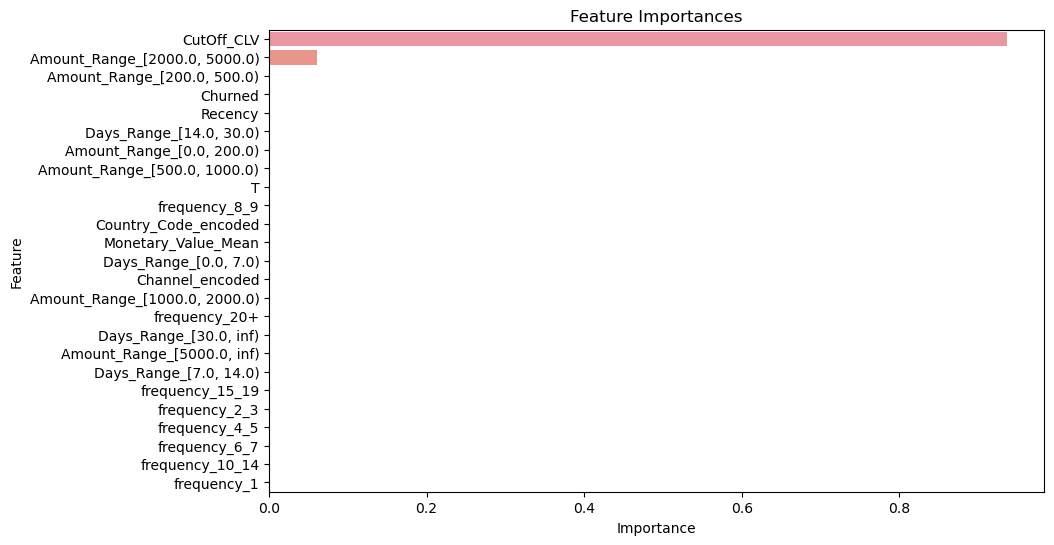

In [17]:
# Train the model with the best hyperparameters from the grid search
best_model.fit(X_train, y_train)

# Get feature importances
feature_importances = best_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X_columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Set display format to show importance values in decimals
pd.set_option('display.float_format', lambda x: '%.6f' % x)

# Display or print the feature importances
print(feature_importance_df)

# Optionally, visualize the feature importances
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.show()


The chart below illustrates the predicted CLV compared to the actual CLV for each customer. This visualization enables us to evaluate the variance between each prediction and its corresponding actual value. Examining the plotted points provides insights into the model's accuracy in estimating CLV across various customer instances. Only 90% of the data is plotted since values beyond this range significantly surpass the others, making the interpretation of results challenging. Through the plot below, we can visualize the relationship between the actual CLV and predicted CLV. It is evident that there is a strong correlation between the two values, which validates the accuracy of the model.

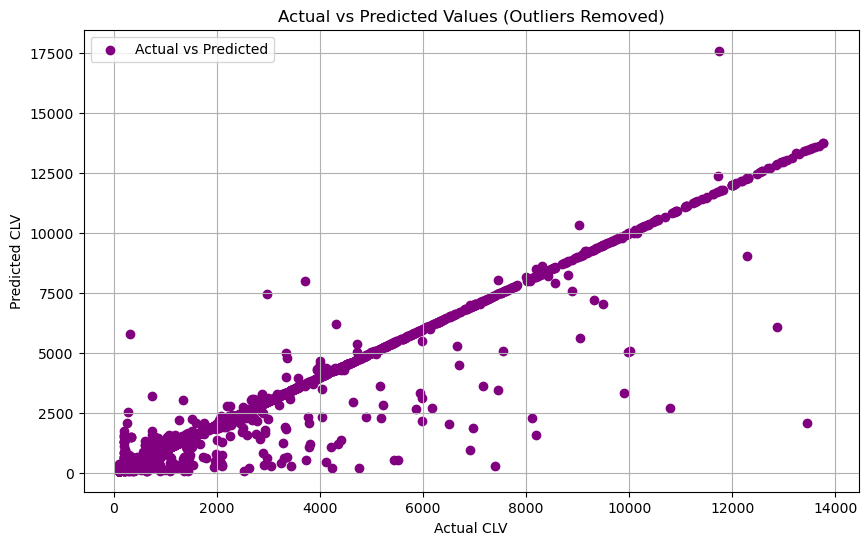

In [18]:
# Merge DataFrames on 'Customer_ID'
pred_actual_df = pd.merge(clv_results_df1, predictions_df, on='Customer_ID')

# Calculate IQR to filter out top 10% of '3month_CLV' data
q1, q3 = pred_actual_df['3month_CLV'].quantile([0.1, 0.9])
iqr = q3 - q1

# Define a threshold for outliers, for example, 1.5 times the IQR
outlier_threshold = 1.5

# Filter out rows with CLV values outside the threshold
filtered_df = pred_actual_df[
    (pred_actual_df['3month_CLV'] >= q1 - outlier_threshold * iqr) &
    (pred_actual_df['3month_CLV'] <= q3 + outlier_threshold * iqr)
]

# Plotting using a scatter plot without customer IDs for the filtered data
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['3month_CLV'], filtered_df['Prediction_3_month'], label='Actual vs Predicted', color='purple')

plt.title('Actual vs Predicted Values (Outliers Removed)')
plt.xlabel('Actual CLV')
plt.ylabel('Predicted CLV')
plt.legend()
plt.grid(True)
plt.show()